In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2017-01-15 13:29:19,398 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
import seaborn as sns
sns.set_context('notebook')
sns.set(font_scale=2)

In [4]:
import glob

In [7]:
files = glob.glob('/artemis/readout/2017-01-1[45]_*_dB_dac.nc')
files.sort()
#files = files[2:]

In [8]:
len(files)

72

In [9]:
def get_df(fn):
    try:
        ncf = NCFile(fn)
#        print fn
        ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)
        return ssa.to_dataframe()    
    except Exception as e:
#        print "bad:",fn,e
        return None

In [10]:
import joblib
import pandas as pd

In [11]:
pp = joblib.Parallel(n_jobs=20,verbose=5)
rows = pp([joblib.delayed(get_df)(fn) for fn in files])

[Parallel(n_jobs=20)]: Done  32 tasks      | elapsed:  2.8min
[Parallel(n_jobs=20)]: Done  72 out of  72 | elapsed:  5.7min finished


In [12]:
rows = [row for row in rows if row is not None]
df = pd.concat(rows,ignore_index=True)
df.shape

(288, 80)

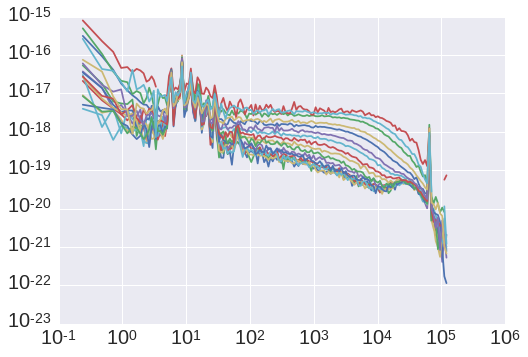

In [13]:
dd = df[(df.number==1) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx-row.S_yy)

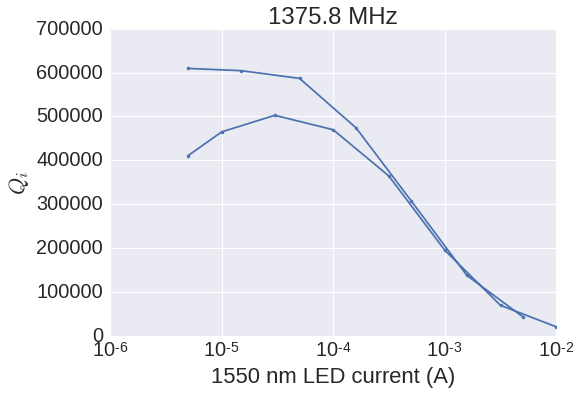

In [14]:
dd = df[(df.number==1) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
semilogx(dd.stream_sourcemeter_current,dd.res_Q_i,'.-')
xlabel('1550 nm LED current (A)')
ylabel('$Q_i$')
title('%.1f MHz' % (dd.res_f_0.max()/1e6))

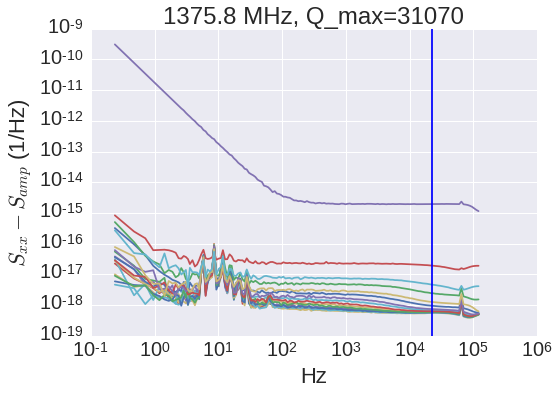

In [15]:
dd = df[(df.number==1) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx)
axvline((dd.res_f_0.max()/(2*dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')

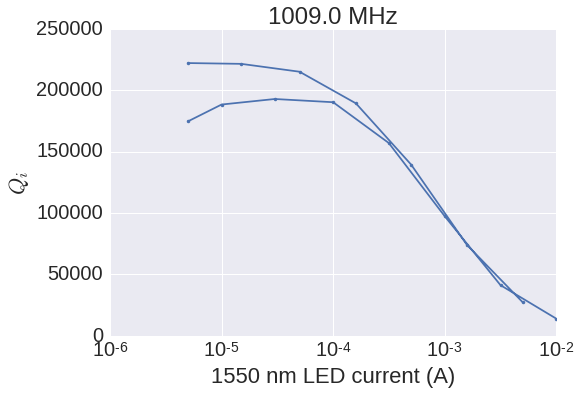

In [16]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
semilogx(dd.stream_sourcemeter_current,dd.res_Q_i,'.-')
xlabel('1550 nm LED current (A)')
ylabel('$Q_i$')
title('%.1f MHz' % (dd.res_f_0.max()/1e6))

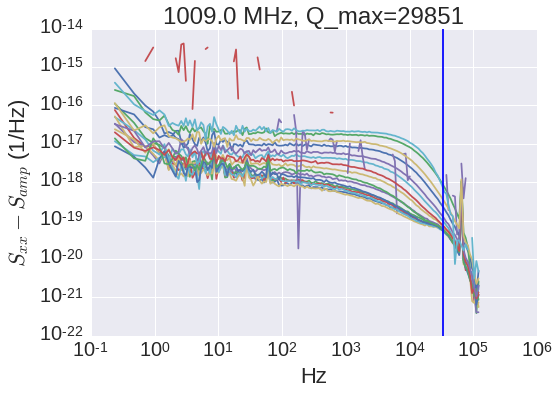

In [17]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx-row.S_yy)#-.5e-19)
axvline((dd.res_f_0.max()/(dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')

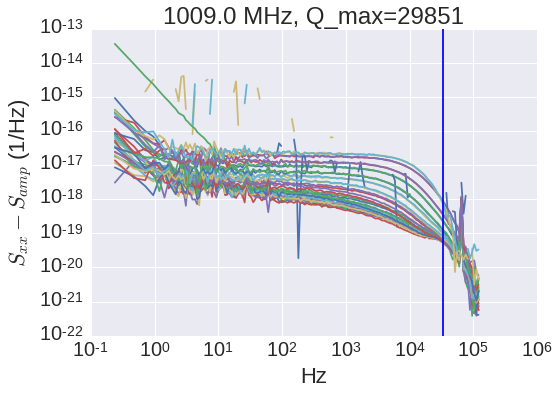

In [18]:
dd = df[(df.number==0)  & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx-row.S_yy)
axvline((dd.res_f_0.max()/(dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')

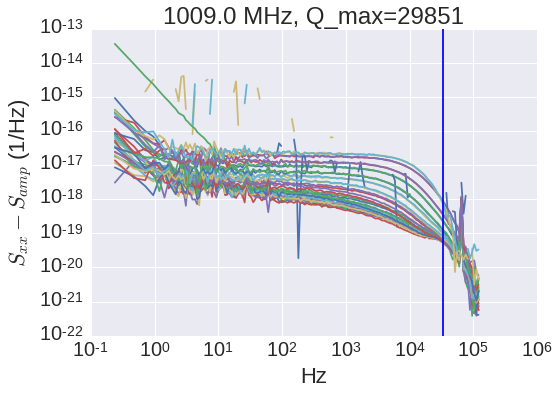

In [19]:
dd = df[(df.number==0)  & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx-row.S_yy)
axvline((dd.res_f_0.max()/(dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')
#xscale('linear')

(0.1, 60000.0)

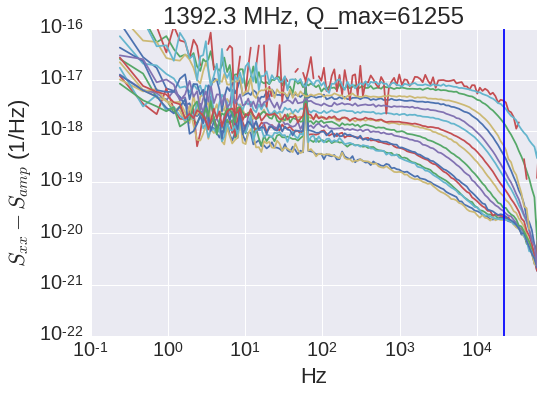

In [20]:
dd = df[(df.number==2) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx-row.S_yy)
axvline((dd.res_f_0.max()/(dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')
ylim(1e-22,1e-16)
xlim(1e-1,6e4)
#xscale('linear')

(0.1, 60000.0)

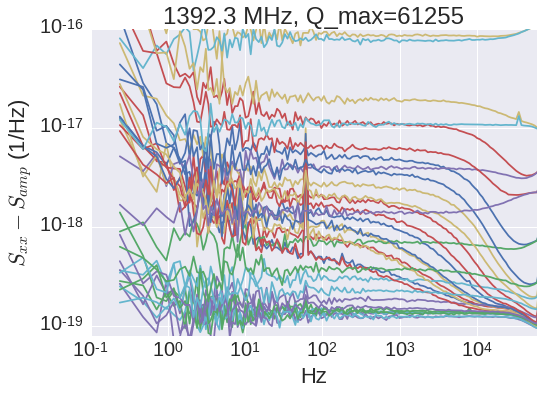

In [21]:
dd = df[(df.number==2) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx)
    loglog(row.S_frequency,row.S_yy)
axvline((dd.res_f_0.max()/(dd.res_Q.min())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')
ylim(8e-20,1e-16)
xlim(1e-1,6e4)
#xscale('linear')

(0.1, 60000.0)

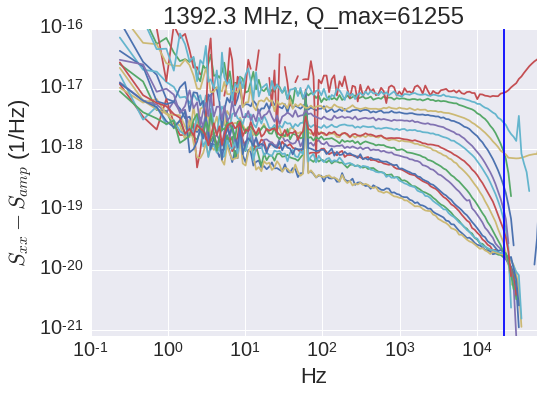

In [22]:
dd = df[(df.number==2) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency>500) & (row.S_frequency<5000)
    loglog(row.S_frequency,row.S_xx-np.mean(row.S_yy[mask]))
axvline((dd.res_f_0.max()/(dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')
ylim(8e-22,1e-16)
xlim(1e-1,6e4)
#xscale('linear')

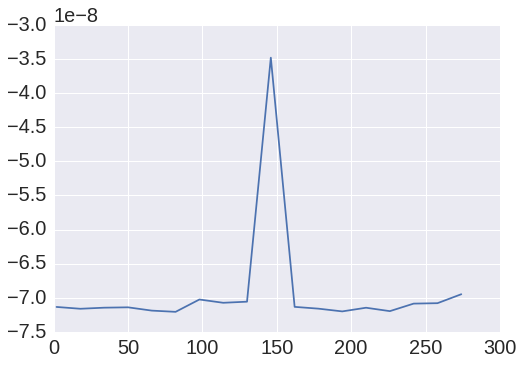

In [23]:
plot(dd.res_delay)

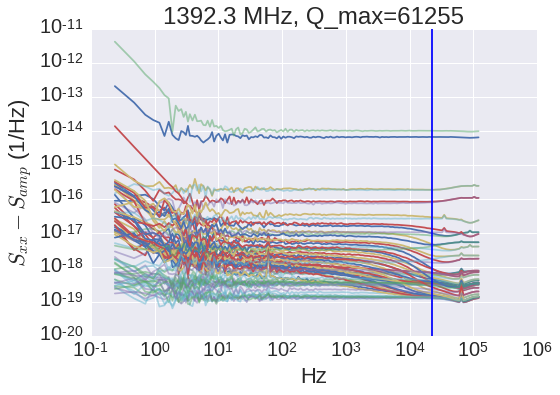

In [24]:
dd = df[(df.number==2)  & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx)
    loglog(row.S_frequency,row.S_yy,alpha=.5)
    #loglog(row)
axvline((dd.res_f_0.max()/(dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')

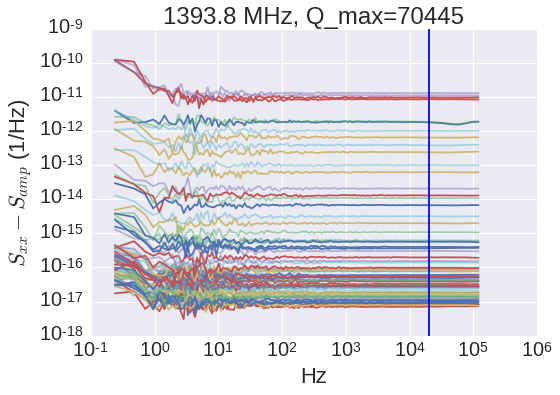

In [25]:
dd = df[(df.number==3)  & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_xx)
    loglog(row.S_frequency,row.S_yy,alpha=.5)
    #loglog(row)
axvline((dd.res_f_0.max()/(dd.res_Q.max())))
title('%.1f MHz, Q_max=%.0f'  %(dd.res_f_0.max()/1e6,
                                              dd.res_Q.max(),
                                              ))
ylabel('$S_{xx} - S_{amp}$ (1/Hz)')
xlabel('Hz')

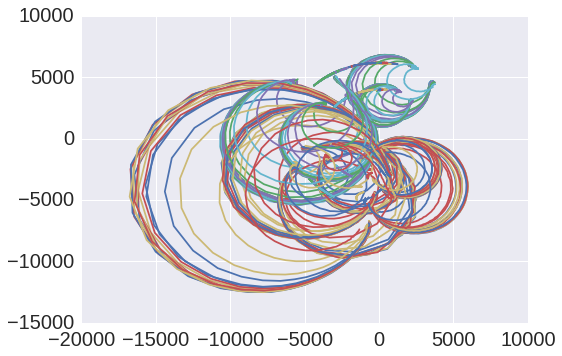

In [26]:
for k,row in df.iterrows():
    plot_ri(row.res_s21_data*2**15/(row.roach_waveform_normalization))

1e6/(3e3*2*np.pi)

In [113]:
1e6/(200*2*np.pi)

795.7747154594766

In [112]:
1/(800e-6*2*np.pi)

198.94367886486918

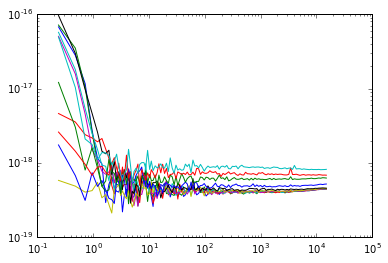

In [41]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    loglog(row.S_frequency,row.S_yy)

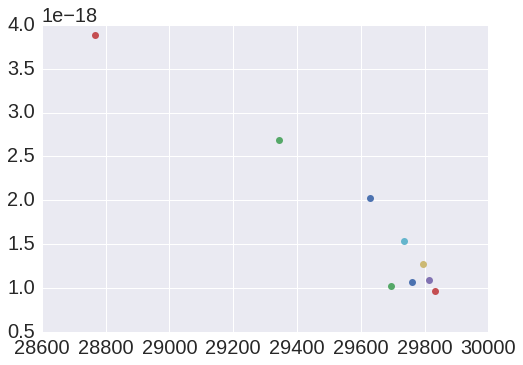

In [23]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency <300) & (row.S_frequency > 100)
    plot(row.res_Q,(row.S_xx-row.S_yy)[mask].mean(),'o')

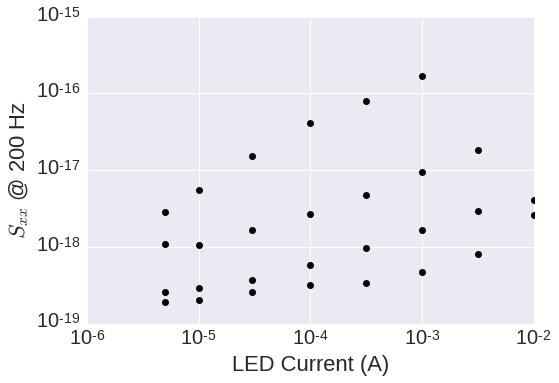

In [26]:
dd = df[(df.number<=1) & (df.roach_dac_attenuation==6) ]#& (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency <300) & (row.S_frequency > 100)
    if row.stream_sourcemeter_current > 0:
        loglog(row.stream_sourcemeter_current,(row.S_xx-row.S_yy)[mask].mean(),'ko')
    #else:
        #axhline((row.S_xx-row.S_yy)[mask].mean())
ylabel('$S_{xx}$ @ 200 Hz')
xlabel('LED Current (A)')

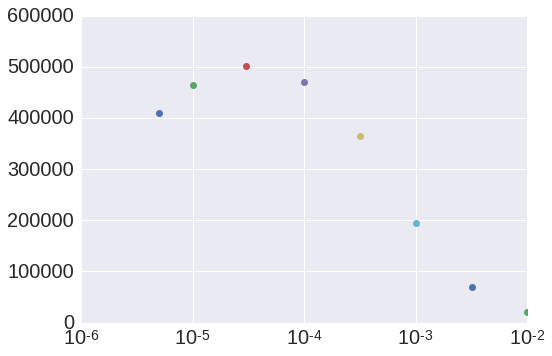

In [27]:
dd = df[(df.number==1) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency <300) & (row.S_frequency > 100)
    if row.stream_sourcemeter_current > 0:
        semilogx(row.stream_sourcemeter_current,row.res_Q_i,'o')

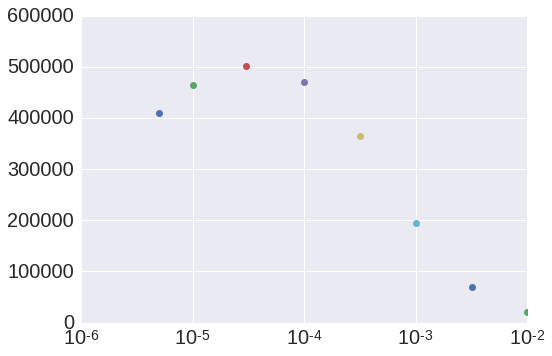

In [28]:
dd = df[(df.number==1) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency <300) & (row.S_frequency > 100)
    if row.stream_sourcemeter_current > 0:
        semilogx(row.stream_sourcemeter_current,row.res_Q_i,'o')

In [71]:
dd.res_f_0.mean()

1375534912.6268172

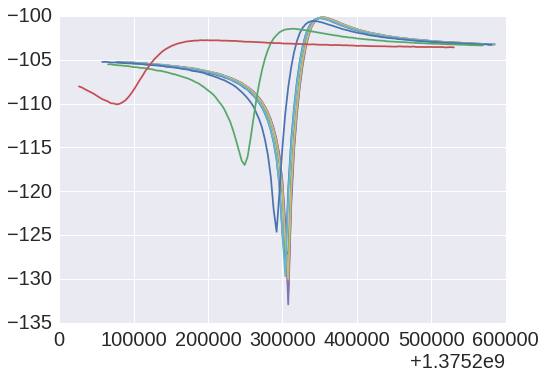

In [29]:
dd = df[(df.number==1) & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    plot(row.res_frequency_data,dB(row.res_s21_data))


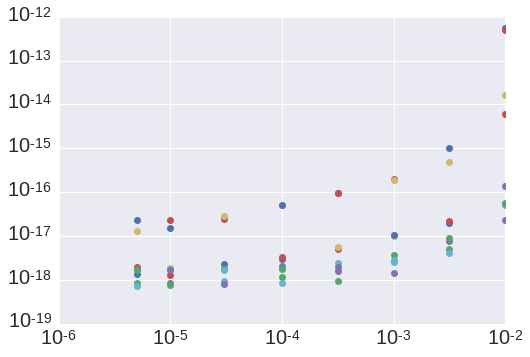

In [30]:
dd = df[(df.number<=1)]# & (df.roach_dac_attenuation==6) & (df.res_f_0<1400e6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency <300) & (row.S_frequency > 100)
    if row.stream_sourcemeter_current > 0:
        loglog(row.stream_sourcemeter_current,(row.S_xx)[mask].mean(),'o')

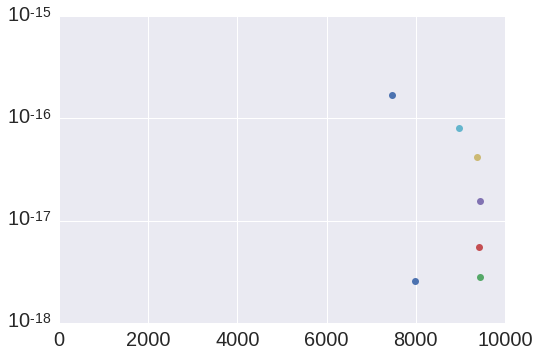

In [31]:
dd = df[(df.number==0) & (df.roach_dac_attenuation==6) & (df.res_f_0>1400e6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency <300) & (row.S_frequency > 100)
    semilogy(row.res_Q,(row.S_xx-row.S_yy)[mask].mean(),'o')

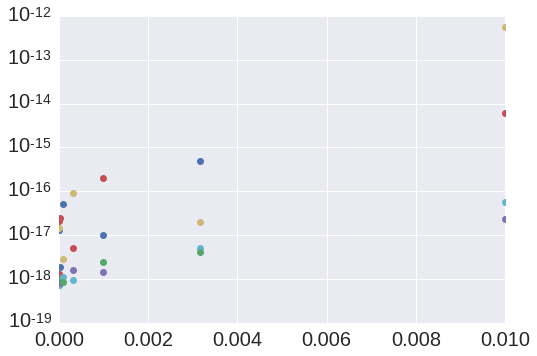

In [32]:
dd = df[(df.number<=1) & (df.roach_dac_attenuation==6)]
for k,row in dd.iterrows():
    mask = (row.S_frequency <300) & (row.S_frequency > 100)
    semilogy(row.stream_sourcemeter_current,(row.S_xx)[mask].mean(),'o')

In [133]:
ncf = NCFile(files[0])

In [134]:
ssa = basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)

In [135]:
ss = ssa.sweep_stream(0)

In [136]:
ss.sweep.state

StateDict({u'signal_conditioner': StateDict({u'adc_chain_gain': 0.0, u'description': u'Mark I 1-2 GHz', u'dac_chain_gain': -39}), u'sourcemeter': StateDict({u'current': 0.001, u'voltage': 2.2410290000000002})})

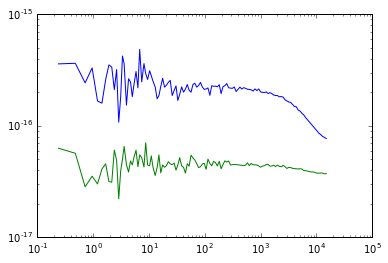

In [137]:
loglog(ss.S_frequency,ss.S_xx)
loglog(ss.S_frequency,ss.S_yy)

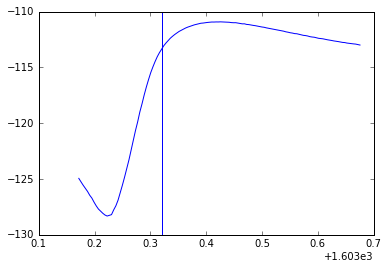

In [138]:
plot(ss.sweep.frequency_MHz,dB(ss.sweep.s21_point))
axvline(ss.stream.frequency_MHz)